SVM_algorithm

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [27]:
feature_df = pd.read_csv(r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Features\tsfresh_efficient_features(intrinsic).csv")
print(feature_df)
print(len(feature_df.columns))

          Unnamed: 0  Angle (deg)__variance_larger_than_standard_deviation  \
0     id030520234000                                                1.0      
1     id030520234001                                                1.0      
2     id030520234002                                                1.0      
3     id030520234003                                                1.0      
4     id030520234004                                                1.0      
...              ...                                                ...      
1336  id280420233082                                                1.0      
1337  id280420233083                                                1.0      
1338  id280420233084                                                1.0      
1339  id280420233085                                                1.0      
1340  id280420233086                                                1.0      

      Angle (deg)__has_duplicate_max  Angle (deg)__has_duplicat

In [28]:
# Assume that labels are in a separate dataframe
feature_df = feature_df.rename(columns={'Unnamed: 0': 'id'})
labels = pd.read_csv(r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Data\Labels_names.csv")
labels = labels.rename(columns={'File Name': 'id'})

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder and transform the labels
labels['Label'] = encoder.fit_transform(labels['Label'])

# Print original labels and their encoded values
for original, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f'Original: {original}, Encoded: {encoded}')

# Merge features and labels
data = pd.merge(feature_df, labels, on='id')

print(data)

Original: N, Encoded: 0
Original: NS, Encoded: 1
Original: OT, Encoded: 2
Original: P, Encoded: 3
Original: UT, Encoded: 4
                  id  Angle (deg)__variance_larger_than_standard_deviation  \
0     id030520234000                                                1.0      
1     id030520234001                                                1.0      
2     id030520234002                                                1.0      
3     id030520234003                                                1.0      
4     id030520234004                                                1.0      
...              ...                                                ...      
1336  id280420233082                                                1.0      
1337  id280420233083                                                1.0      
1338  id280420233084                                                1.0      
1339  id280420233085                                                1.0      
1340  id28042023308

In [29]:
nan_columns = data.isna().any()
nan_cols_list = data.columns[data.isna().any()].tolist()

print(nan_columns)
print(nan_cols_list)

id                                                                False
Angle (deg)__variance_larger_than_standard_deviation              False
Angle (deg)__has_duplicate_max                                    False
Angle (deg)__has_duplicate_min                                    False
Angle (deg)__has_duplicate                                        False
                                                                  ...  
Torque (Nm)__permutation_entropy__dimension_6__tau_1              False
Torque (Nm)__permutation_entropy__dimension_7__tau_1              False
Torque (Nm)__query_similarity_count__query_None__threshold_0.0    False
Torque (Nm)__mean_n_absolute_max__number_of_maxima_7              False
Label                                                             False
Length: 3887, dtype: bool
[]


In [30]:
# Drop filename column (we don't need it for the model)
data = data.drop(columns='id')

# Separate features and labels
X = data.drop(columns='Label')
y = data['Label']

In [31]:
#Scaling features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assume that data contains only features and no labels.
scaled_data = scaler.fit_transform(X)

# Convert the numpy array back into pandas dataframe
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=42)

In [33]:
# Create a SVM model with a radial basis function (RBF) kernel
from sklearn import svm
#svm_model = SVC(kernel='rbf')
svm_model = svm.SVC(kernel='rbf', probability=True)
# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_s = svm_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_s))
print('Accuracy:', accuracy_score(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       165
           1       0.97      1.00      0.99        66
           2       0.94      0.94      0.94       138
           3       0.97      0.98      0.97        59
           4       0.93      0.96      0.95       109

    accuracy                           0.96       537
   macro avg       0.96      0.97      0.96       537
weighted avg       0.96      0.96      0.96       537

Accuracy: 0.957169459962756


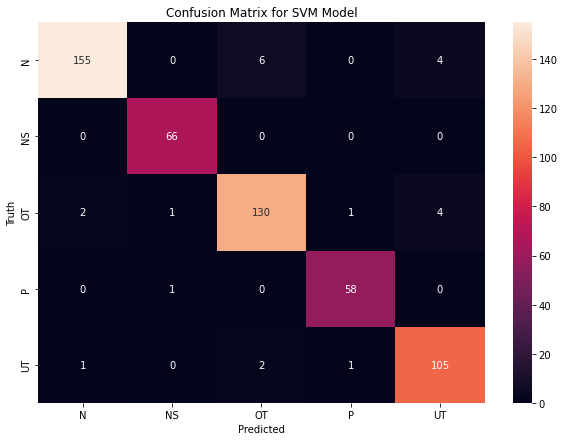

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_s = svm_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_s)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM Model')

# Show the plot
plt.show()

# KNN algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [36]:
# Creating the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_k = knn.predict(X_test)

# Evaluating the KNN classifier's performance
print(classification_report(y_test, y_pred_k))
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_k))



              precision    recall  f1-score   support

           0       0.98      0.93      0.96       165
           1       0.88      0.98      0.93        66
           2       0.92      0.96      0.94       138
           3       0.96      0.86      0.91        59
           4       0.94      0.94      0.94       109

    accuracy                           0.94       537
   macro avg       0.94      0.94      0.94       537
weighted avg       0.94      0.94      0.94       537

Accuracy: 0.9404096834264432


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

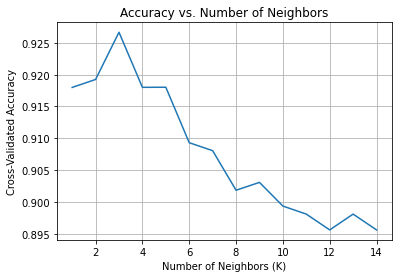

Best parameters:  {'n_neighbors': 3}
Best cross-validation score:  0.9266666666666665


In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameter values to be searched
k_range = list(range(1, 15))

# Create a parameter grid: map the parameter names to the values to be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# Extract mean cross-validation scores for each K value
mean_scores = grid.cv_results_['mean_test_score']

# Plot the scores
plt.figure()
plt.plot(k_range, mean_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

# Print the details
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


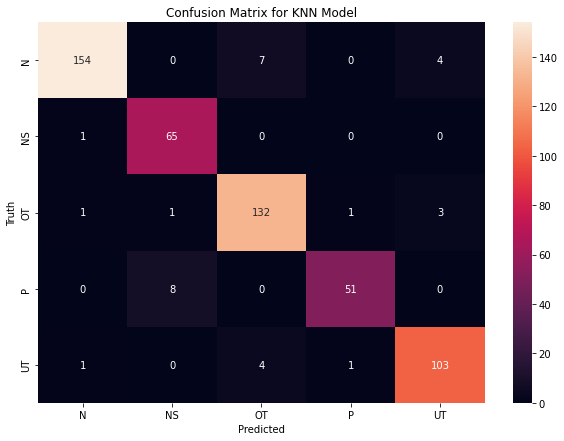

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_s = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_k)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN Model')

# Show the plot
plt.show()

# Random forrest

In [15]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and test sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the model
model.fit(X_train_r, y_train_r)

# Make predictions on the test set
y_pred_r = model.predict(X_test_r)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test_r, y_pred_r))


# Evaluate the model's performance
print(classification_report(y_test_r, y_pred_r))

Accuracy: 0.9683426443202979
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       165
           1       0.99      1.00      0.99        66
           2       0.98      0.94      0.96       138
           3       0.97      1.00      0.98        59
           4       0.92      0.97      0.95       109

    accuracy                           0.97       537
   macro avg       0.97      0.98      0.97       537
weighted avg       0.97      0.97      0.97       537



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)

# Split data into training and test sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the K-fold cross validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform K-fold cross-validation
cv_results = cross_val_score(model, X_train_r, y_train_r, cv=kfold, scoring='accuracy')

# Print the mean cross-validation accuracy
print('Cross-validation accuracy:', cv_results.mean())

# Train the model on the full training set
model.fit(X_train_r, y_train_r)

# Make predictions on the test set
y_pred_r = model.predict(X_test_r)

# Evaluate the model
print('Test set accuracy:', accuracy_score(y_test_r, y_pred_r))

# Evaluate the model's performance
print(classification_report(y_test_r, y_pred_r))

Cross-validation accuracy: 0.9639285714285715
Test set accuracy: 0.9683426443202979
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       165
           1       0.99      1.00      0.99        66
           2       0.98      0.94      0.96       138
           3       0.97      1.00      0.98        59
           4       0.92      0.97      0.95       109

    accuracy                           0.97       537
   macro avg       0.97      0.98      0.97       537
weighted avg       0.97      0.97      0.97       537



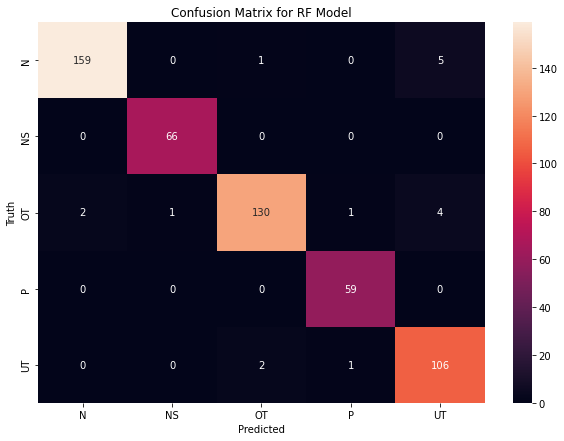

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_s = model.predict(X_test_r)

# Compute the confusion matrix
cm = confusion_matrix(y_test_r, y_pred_r)

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for RF Model')

# Show the plot
plt.show()

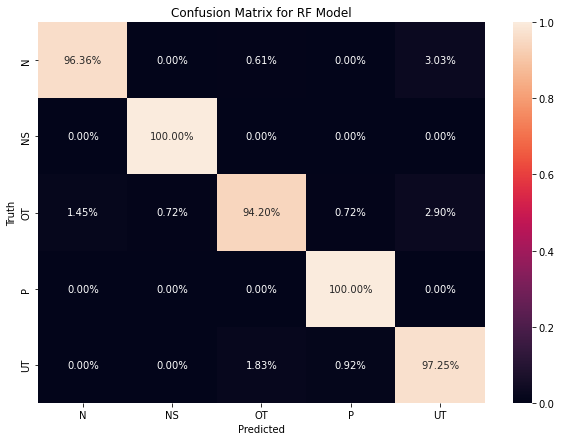

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred_r = model.predict(X_test_r)

# Compute the confusion matrix
cm = confusion_matrix(y_test_r, y_pred_r)

# Convert confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap for visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='.2%', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for RF Model')

# Show the plot
plt.show()

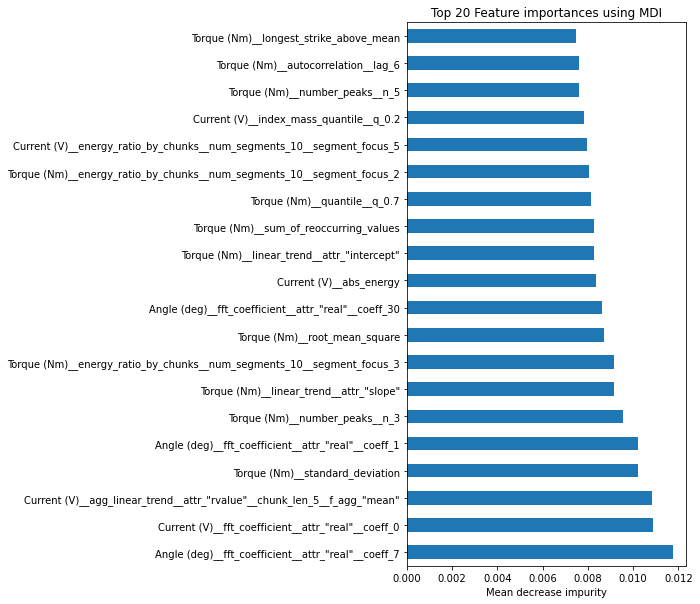

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assume rf_model is your trained RandomForestClassifier
importances = model.feature_importances_

# Get the names of the features from your dataframe
feature_names = X.columns

# Create arrays from feature importance and feature names
forest_importances = pd.Series(importances, index=feature_names)

# Define the number of most important features to plot
N = 20

# Sort the feature importances in decreasing order
sorted_idx = np.argsort(forest_importances)[::-1]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 10))

# Create a bar plot for the top N features
forest_importances[sorted_idx[:N]].plot(kind='barh', ax=ax)

# Set the labels
ax.set_title("Top 20 Feature importances using MDI")
ax.set_xlabel("Mean decrease impurity")

# Show the plot
plt.show()

# Making comparisons

G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.9404096834264432
KNN Precision: 0.9404096834264432
KNN Recall: 0.9404096834264432
KNN F1 Score: 0.9404096834264432
SVM Accuracy: 0.957169459962756
SVM Precision: 0.957169459962756
SVM Recall: 0.957169459962756
SVM F1 Score: 0.957169459962756
RF Accuracy: 0.9683426443202979
RF Precision: 0.9683426443202979
RF Recall: 0.9683426443202979
RF F1 Score: 0.9683426443202979


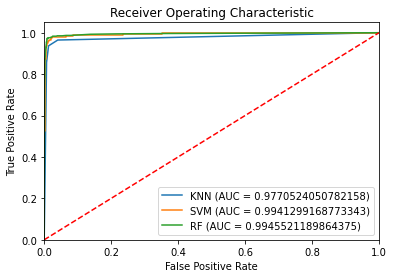

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

def evaluate_model(name, model, features, labels):
    predictions = model.predict(features)
    # Compute metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='micro')
    recall = recall_score(labels, predictions, average='micro')
    f1 = f1_score(labels, predictions, average='micro')

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Precision: {precision}')
    print(f'{name} Recall: {recall}')
    print(f'{name} F1 Score: {f1}')
    
    # Compute ROC curve for each class
    n_classes = len(set(labels))
    y_test_bin = label_binarize(labels, classes=[*range(n_classes)])
    y_score = model.predict_proba(features)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr['micro'], tpr['micro'], label=f'{name} (AUC = {roc_auc["micro"]})')

# Assume that you've split your data into features and labels (ground truth), and that you've trained your models
# features_test, labels_test are the testing features and labels
# knn_model, svm_model, rf_model are your trained models

evaluate_model('KNN', knn, X_test, y_test)
evaluate_model('SVM', svm_model, X_test, y_test)
evaluate_model('RF', model, X_test_r, y_test_r)

# Plotting ROC curves
plt.plot([0, 1], [0, 1],'r--') # plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.9404096834264432
KNN Precision: 0.942349987681279
KNN Recall: 0.9404096834264432
KNN F1 Score: 0.9404559963059165
SVM Accuracy: 0.957169459962756
SVM Precision: 0.9576209149181527
SVM Recall: 0.957169459962756
SVM F1 Score: 0.9571597237433783
RF Accuracy: 0.9683426443202979
RF Precision: 0.9690644189294905
RF Recall: 0.9683426443202979
RF F1 Score: 0.9683995988482604


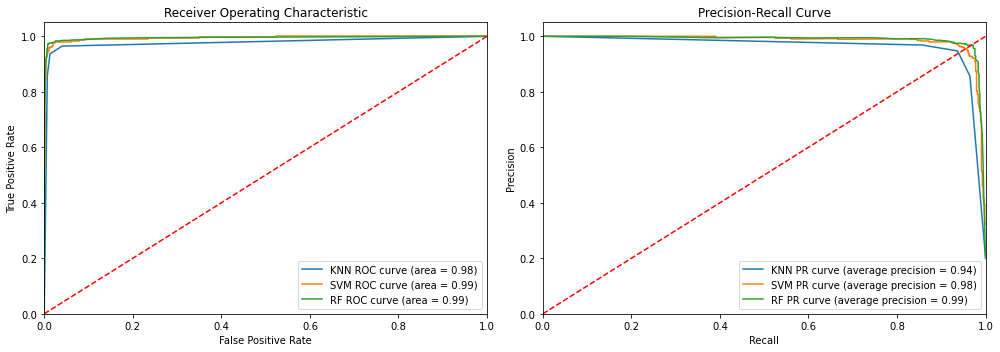

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def evaluate_model(name, model, features, labels, ax):
    predictions = model.predict(features)
    # Compute metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Precision: {precision}')
    print(f'{name} Recall: {recall}')
    print(f'{name} F1 Score: {f1}')
    
    # Compute ROC curve for each class
    n_classes = len(set(labels))
    y_test_bin = label_binarize(labels, classes=[*range(n_classes)])
    y_score = model.predict_proba(features)
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Compute micro-average Precision-Recall curve and area
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    average_precision = average_precision_score(y_test_bin, y_score, average="micro")
    
    ax[0].plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:0.2f})')
    ax[1].plot(recall, precision, label=f'{name} PR curve (average precision = {average_precision:0.2f})')

    return ax

# Prepare the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Evaluate models
ax = evaluate_model('KNN', knn, X_test, y_test, ax)
ax = evaluate_model('SVM', svm_model, X_test, y_test, ax)
ax = evaluate_model('RF', model, X_test_r, y_test_r, ax)

# Add common configurations
for a in ax:
    a.plot([0, 1], [0, 1],'r--')
    a.set_xlim([0.0, 1.0])
    a.set_ylim([0.0, 1.05])
    a.legend(loc="lower right")

ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic')

ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [('KNN', KNeighborsClassifier()),
               ('SVM', SVC(probability=True)),
               ('RF', RandomForestClassifier())]

# Define meta learner model
meta_model = LogisticRegression()

# Define the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model on our data
stacking_model.fit(X_train, y_train)

# Evaluate the model
y_pred = stacking_model.predict(X_test)
print(classification_report(y_test, y_pred))


In [19]:
import pandas as pd

# Get the feature importance
importances = model.feature_importances_

# Sum up total importance
total_importance = sum(importances)

# Get the feature names
feature_names = X.columns

# Combine the feature names and their corresponding importance into a dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the dataframe based on importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Calculate cumulative importance
importance_df['cumulative_importance'] = importance_df['importance'].cumsum() / total_importance

# Get the features that make up 50% of the importance
important_features = importance_df[importance_df['cumulative_importance'] <= 0.5]['feature']

# Print the important feature names
print(important_features.tolist())

['Angle (deg)__fft_coefficient__attr_"real"__coeff_7', 'Current (V)__fft_coefficient__attr_"real"__coeff_0', 'Current (V)__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"', 'Torque (Nm)__standard_deviation', 'Angle (deg)__fft_coefficient__attr_"real"__coeff_1', 'Torque (Nm)__number_peaks__n_3', 'Torque (Nm)__linear_trend__attr_"slope"', 'Torque (Nm)__energy_ratio_by_chunks__num_segments_10__segment_focus_3', 'Torque (Nm)__root_mean_square', 'Angle (deg)__fft_coefficient__attr_"real"__coeff_30', 'Current (V)__abs_energy', 'Torque (Nm)__linear_trend__attr_"intercept"', 'Torque (Nm)__sum_of_reoccurring_values', 'Torque (Nm)__quantile__q_0.7', 'Torque (Nm)__energy_ratio_by_chunks__num_segments_10__segment_focus_2', 'Current (V)__energy_ratio_by_chunks__num_segments_10__segment_focus_5', 'Current (V)__index_mass_quantile__q_0.2', 'Torque (Nm)__number_peaks__n_5', 'Torque (Nm)__autocorrelation__lag_6', 'Torque (Nm)__longest_strike_above_mean', 'Torque (Nm)__autocorrelation__lag_5'